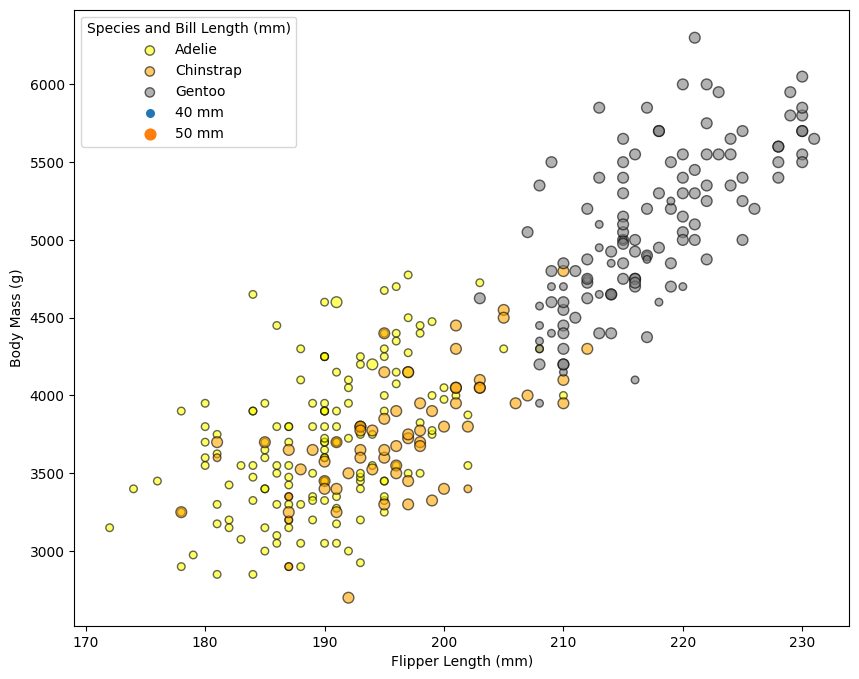

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("penglings.csv")
data.dropna(subset=['body_mass_g', 'flipper_length_mm'], inplace=True)

def get_bill_size(bill_length_mm):
    return 30 if bill_length_mm < 45 else 60

data['bill_length_mm_size'] = data['bill_length_mm'].apply(get_bill_size)

color_dict = {'Adelie': 'yellow', 'Chinstrap': 'orange', 'Gentoo': 'grey'}
data['color'] = data['species'].map(color_dict)

plt.figure(figsize=(10, 8))
for species, group in data.groupby('species'):
    plt.scatter(group['flipper_length_mm'], group['body_mass_g'], label=species, color=group['color'], edgecolors = 'black' ,alpha=0.6, s=group['bill_length_mm_size'])

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
legend_sizes = [plt.scatter([], [], s=size[0], label=f'{size[1]} mm') for size in [[30,40],[60,50]]]
plt.legend(title='Bill Size (mm)', handles=legend_sizes)
plt.legend(title='Species and Bill Length (mm)', loc='upper left')
plt.show()